In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset_path = '/content/drive/My Drive/Machine Learning Project files/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
md = pd.read_csv(dataset_path+'movies_metadata.csv')
print(md.head(10))

   adult  ... vote_count
0  False  ...     5415.0
1  False  ...     2413.0
2  False  ...       92.0
3  False  ...       34.0
4  False  ...      173.0
5  False  ...     1886.0
6  False  ...      141.0
7  False  ...       45.0
8  False  ...      174.0
9  False  ...     1194.0

[10 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
print(md.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


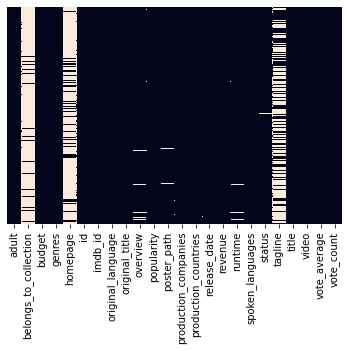

In [ ]:
sns.heatmap(md.isnull(), yticklabels=False, cbar=None)

In [ ]:
df=md
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [ ]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS

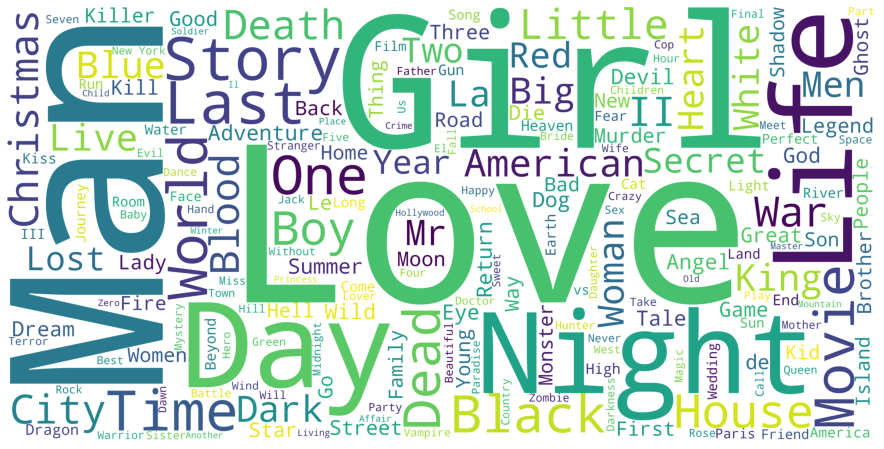

In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from ast import literal_eval

In [ ]:
def getting_genre(str):
  l = literal_eval(str)
  if(len(l)==0):
    return ["None"]
  #print(type(l))
  dictionary = l[0]
  genre = [dictionary['name']]
  return genre

In [ ]:
md['genres'] = md['genres'].fillna('[]').apply(getting_genre)
md.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,[Animation],http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,[Adventure],NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,[Romance],NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,[Comedy],NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,[Action],NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.9249,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,[Comedy],NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.67728,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,[Action],NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,[Action],NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1'

In [ ]:
# Converting data type of vote_count and vote_average to int
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')

In [ ]:
# Calculating the 95% percentile of vote_counts and mean of vote_average.
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
m = vote_counts.quantile(0.95)

vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
print(m)
print(C)

434.0
5.244896612406511


In [ ]:
columns_to_include = ['title', 'release_date', 'vote_count', 'vote_average', 'popularity', 'genres']
qualified = md[(md['vote_count'].notnull()) & (md['vote_average'].notnull()) & (md['vote_count']>=m)][columns_to_include]
print(qualified.shape)

(2274, 6)


In [ ]:
def weighted_rating(movie):
  v = movie['vote_count']
  R = movie['vote_average']
  return (v/(v+m)*R)+(m/(m+v)*C)

In [ ]:
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified['wr'] = qualified.apply(weighted_rating,axis=1)
qualified = qualified.sort_values('wr',ascending=False)

In [ ]:
simpleRecommendations = qualified
simpleRecommendations.head(15)

,title,release_date,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010-07-14,14075,8,29.1081,[Action],7.917588
12481,The Dark Knight,2008-07-16,12269,8,123.167,[Drama],7.905871
22879,Interstellar,2014-11-05,11187,8,32.2135,[Adventure],7.897107
2843,Fight Club,1999-10-15,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,8892,8,32.0707,[Adventure],7.871787
292,Pulp Fiction,1994-09-10,8670,8,140.95,[Thriller],7.868660
314,The Shawshank Redemption,1994-09-23,8358,8,51.6454,[Drama],7.864000
7000,The Lord of the Rings: The Return of the King,2003-12-01,8226,8,29.3244,[Adventure],7.861927
351,Forrest Gump,1994-07-06,8147,8,48.3072,[Comedy],7.860656
5814,The Lord of the Rings: The Two Towers,2002-12-18,7641,8,29.4235,[Adventure],7.851924


In [ ]:
def get_genre(movie):
  return movie['genres'][0]
md['genres'] = md.apply(get_genre,axis=1)
md.head(15)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,Animation,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,Adventure,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,Romance,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,Comedy,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,Action,NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.9249,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,Comedy,NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.67728,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,Action,NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,Action,NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'E

In [ ]:
def build_chart(genre,percentile=0.85):
  df = md[md['genres']==genre]
  print(df.shape)
  vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
  vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
  C = vote_averages.mean() 
  m = vote_counts.quantile(percentile)
  print("For {} movies, mean vote average is {} and minimum vote counts consiidered are {}".format(genre,C,m))

  columns_to_include = ['title', 'release_date', 'vote_count', 'vote_average', 'popularity','genres']
  qualified = df[(df['vote_count'].notnull()) & (df['vote_average'].notnull()) & (df['vote_count']>=m)][columns_to_include]
  qualified['vote_count'] = qualified['vote_count'].astype('int')
  qualified['vote_average']=qualified['vote_average'].astype('int')
  qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
  qualified = qualified.sort_values('wr',ascending=False)
  return qualified

In [ ]:
recommendations = build_chart('Romance')
print(type(recommendations))
recommendations

(1191, 24)
For Romance movies, mean vote average is 5.248530646515533 and minimum vote counts consiidered are 50.5
<class 'pandas.core.frame.DataFrame'>


,title,release_date,vote_count,vote_average,popularity,genres,wr
40251,Your Name.,2016-08-26,1030,8,34.461252,Romance,7.871403
37863,Sing Street,2016-03-11,669,8,10.672862,Romance,7.806881
25718,Hotarubi no Mori e,2011-09-17,105,8,0.005007,Romance,7.106436
22168,Her,2013-12-18,4215,7,13.8295,Romance,6.979264
23512,The Fault in Our Stars,2014-05-16,3868,7,16.2747,Romance,6.977428
...,...,...,...,...,...,...,...
21698,Don Jon,2013-07-26,1708,5,10.9486,Romance,5.007137
7720,Soul Plane,2004-05-28,109,4,8.60439,Romance,4.395303
5318,Look Who's Talking Now!,1993-11-05,200,4,9.01608,Romance,4.251700
35328,Fifty Shades of Black,2016-01-28,337,4,6.785049,Romance,4.162712


In [ ]:
recommendations1= build_chart('Action')
recommendations1.head(15)

(4489, 24)
For Action movies, mean vote average is 5.167335115864527 and minimum vote counts consiidered are 209.94999999999982


,title,release_date,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010-07-14,14075,8,29.1081,Action,7.958368
4135,Scarface,1983-12-08,3017,8,11.2997,Action,7.815703
1910,Seven Samurai,1954-04-26,892,8,15.0178,Action,7.460304
43190,Band of Brothers,2001-09-09,725,8,7.903731,Action,7.363904
14551,Avatar,2009-12-10,12114,7,185.071,Action,6.968779
26564,Deadpool,2016-02-09,11444,7,187.86,Action,6.966984
23753,Guardians of the Galaxy,2014-07-30,10014,7,53.2916,Action,6.962366
26553,Mad Max: Fury Road,2015-05-13,9629,7,29.3618,Action,6.960893
18252,The Dark Knight Rises,2012-07-16,9263,7,20.5826,Action,6.959382
2458,The Matrix,1999-03-30,9079,7,33.3663,Action,6.958578


In [ ]:
links_small = pd.read_csv(dataset_path+'links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [ ]:
md = md.drop([19730, 29503, 35587])

In [ ]:
md['id'] = md['id'].astype('int')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9099, 24)

In [ ]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import warnings; warnings.simplefilter('ignore')

In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [ ]:
tfidf_matrix.shape

(9099, 268124)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [ ]:
get_recommendations('The Family').head(10)

7391    Did You Hear About the Morgans?
692                       The Godfather
4665    Charlie's Angels: Full Throttle
2642               The Whole Nine Yards
8103                       Bachelorette
1774                     My Blue Heaven
647                              Eraser
2738                        Cool as Ice
3509                               Made
4196                 Johnny Dangerously
Name: title, dtype: object

In [ ]:
credits = pd.read_csv(dataset_path+'credits.csv')
keywords = pd.read_csv(dataset_path+'keywords.csv')

In [ ]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')

In [ ]:
md.shape

(45463, 24)

In [ ]:
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9219, 27)

In [ ]:
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
smd['director'] = smd['crew'].apply(get_director)

In [ ]:
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [ ]:
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [ ]:
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

In [ ]:
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [ ]:
s = s.value_counts()
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

In [ ]:
s = s[s > 1]

In [ ]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [ ]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [ ]:
smd['keywords'] = smd['keywords'].apply(filter_keywords)
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [ ]:
smd['soup'] = smd['keywords'] +smd['director'] + smd['director']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

In [ ]:
smd['soup1'] = smd['keywords'] +smd['director'] + smd['director']
smd['soup1'] = smd['soup1'].apply(lambda x: ' '.join(x))

In [ ]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup1'])

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [ ]:
get_recommendations('The Dark Knight').head(10)

8031         The Dark Knight Rises
7648                     Inception
6218                 Batman Begins
2085                     Following
6623                  The Prestige
3381                       Memento
4145                      Insomnia
8613                  Interstellar
7659    Batman: Under the Red Hood
1134                Batman Returns
Name: title, dtype: object

In [ ]:
get_recommendations('Mean Girls').head(10)

3319               Head Over Heels
7332    Ghosts of Girlfriends Past
6277              Just Like Heaven
1329              The House of Yes
6959     The Spiderwick Chronicles
7905         Mr. Popper's Penguins
4763                 Freaky Friday
8883                      The DUFF
6698         It's a Boy Girl Thing
3712          The Princess Diaries
Name: title, dtype: object

In [ ]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [ ]:
improved_recommendations('The Dark Knight')

,title,vote_count,vote_average,wr
7648,Inception,14075,8,7.917588
8613,Interstellar,11187,8,7.897107
6623,The Prestige,4510,8,7.758148
3381,Memento,4168,8,7.740175
8031,The Dark Knight Rises,9263,7,6.921448
6218,Batman Begins,7511,7,6.904127
8872,Captain America: Civil War,7462,7,6.903532
7583,Kick-Ass,4747,7,6.852979
8419,Man of Steel,6462,6,5.952478
9024,Batman v Superman: Dawn of Justice,7189,5,5.013943


Collaborative Filtering 


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 344kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670904 sha256=4cd2c4ca846d6d0c75091b139e3a73971bf5ff4a9161003ee890cf2a71d1153c
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
reader = Reader()

In [ ]:
ratings = pd.read_csv(dataset_path+'ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [ ]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5)


{'fit_time': (4.847919464111328,
  4.847295522689819,
  4.839834928512573,
  4.813180208206177,
  4.820811748504639),
 'test_mae': array([0.69315318, 0.70118748, 0.68856045, 0.68960252, 0.68102227]),
 'test_rmse': array([0.90219121, 0.90839129, 0.89408955, 0.89643417, 0.88227729]),
 'test_time': (0.15927600860595703,
  0.14341354370117188,
  0.27714991569519043,
  0.14305615425109863,
  0.28618574142456055)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.8663560016562677, details={'was_impossible': False})

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
id_map = pd.read_csv(dataset_path+'links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')

In [ ]:
indices_map = id_map.set_index('id')

In [ ]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [ ]:
hybrid(1, 'Avatar')

,title,vote_count,vote_average,id,est
8401,Star Trek Into Darkness,4479.0,7.4,54138,3.159255
974,Aliens,3282.0,7.7,679,3.147986
899,Platoon,1236.0,7.5,792,3.126822
522,Terminator 2: Judgment Day,4274.0,7.7,280,3.104779
987,Alien,4564.0,7.9,348,3.100046
1011,The Terminator,4208.0,7.4,218,3.066871
922,The Abyss,822.0,7.1,2756,3.027235
5301,Cypher,196.0,6.7,10133,2.965623
4987,Battle Royale,992.0,7.3,3176,2.951908
2014,Fantastic Planet,140.0,7.6,16306,2.798646


In [ ]:
hybrid(500, 'Avatar')

,title,vote_count,vote_average,id,est
4987,Battle Royale,992.0,7.3,3176,3.444521
899,Platoon,1236.0,7.5,792,3.389479
974,Aliens,3282.0,7.7,679,3.320112
5301,Cypher,196.0,6.7,10133,3.312177
1011,The Terminator,4208.0,7.4,218,3.223638
7065,Meet Dave,381.0,5.1,11260,3.194728
8401,Star Trek Into Darkness,4479.0,7.4,54138,3.194711
6316,Star Wreck: In the Pirkinning,27.0,6.6,15493,3.171771
987,Alien,4564.0,7.9,348,3.151968
922,The Abyss,822.0,7.1,2756,3.098245
